<a href="https://www.kaggle.com/code/emrecavdar1565/data-science-tutorial?scriptVersionId=107675803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


In [2]:
data = pd.read_csv('../input/pokemon-challenge/pokemon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


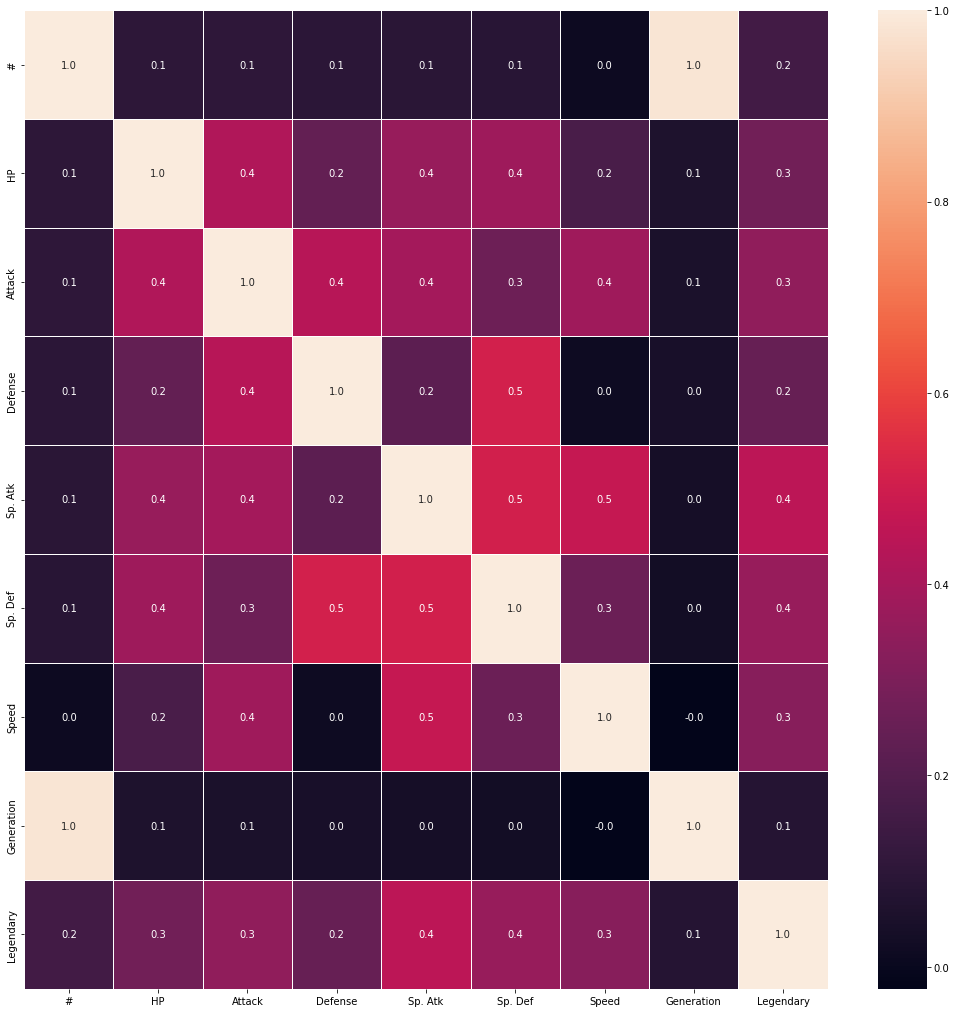

In [4]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

In [5]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [6]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 1. Introduction to Python

**Matplotlib**

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables.
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors, labels, thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle.

Text(0.5, 1.0, 'Line Plot')

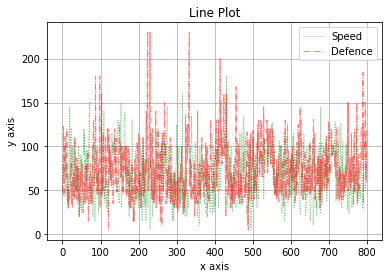

In [7]:
# Line Plot
# color = color, label = label,, linewidth = width of line, alpha = opacity, grid = grid, linestyle = style of line

data.Speed.plot(kind = 'line', color = 'g', label = 'Speed', linewidth = 1, alpha = 0.5, grid = True, linestyle = ':')
data.Defense.plot(color = 'r', label = 'Defence', linewidth = 1, alpha = 0.5, grid = True, linestyle = '-.')
plt.legend(loc='upper right') # legend = puts label into plot
plt.xlabel('x axis')  # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot') # title = title of plot

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

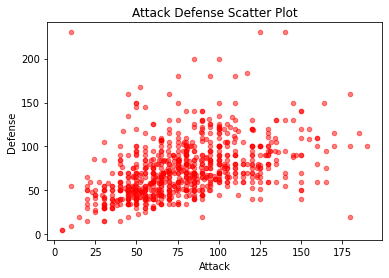

In [8]:
# Scatter Plot
# x = attack, y = defense
data.plot(kind='scatter', x = "Attack", y='Defense', alpha = 0.5, color = 'red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

<AxesSubplot:ylabel='Frequency'>

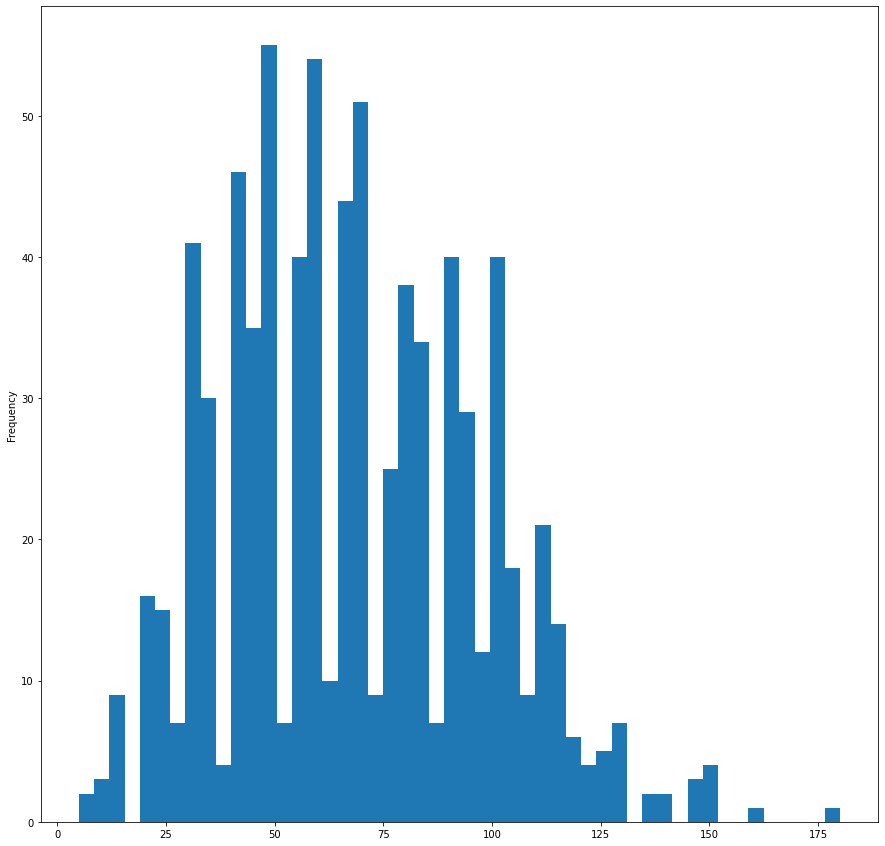

In [9]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind='hist', bins = 50, figsize = (15,15)) # how much pokemon we have on that spped

In [10]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist', bins = 50)
plt.clf()
# We cannot see the plot due to clf()

<Figure size 432x288 with 0 Axes>

***Dictionary***

* It has 'key' and 'value'.
* Faster than lists.

In [11]:
# create dictionary and look its keys and vales
dictionary = {'spain': 'madrid', 'usa': 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [12]:
# keys have to be immutable objects like string, boolean, float, integer or tuples
# list is not immutable
# keys are unique
dictionary['spain'] = "barcelona"  #update existing entry
print(dictionary)
dictionary['france'] = "paris"  #add new entry
print(dictionary)
del dictionary['spain']  #remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)
dictionary.clear()
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [13]:
# del dictionary     #removes completely
print(dictionary)

{}


***Pandas***

CSV: Comma seperated values

In [14]:
data = pd.read_csv('../input/pokemon-challenge/pokemon.csv')

In [15]:
series = data['Defense']   # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]   # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


***Logic, Control Flow and Filtering***

Comparison operators: ==, <, >, <=
Boolean operators: and, or, not

In [16]:
# Comparison operator
print(3 > 2)
print(3!=2)
#Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [17]:
# filtering pands data frame
x = data['Defense']>200
data[x] # only true ones

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [18]:
# filtering pandas with logical_and
data[np.logical_and(data['Defense']>200, data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [19]:
data[(data['Defense']>200) & (data['Attack']>100)]  # another way

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


**While and For Loops**

In [20]:
i = 0
while i != 5 :
    print('i is: ',i)
    i += 1
print(i,'is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5 is equal to 5


In [21]:
lis = [1,2,3,4,5]
for i in lis:
    print('i is:',i)
print('')

#Enumerate index and value of list
# index : value = 0:1, 1:2, ...
for index, value in enumerate(lis):
    print(index,":",value)
print('')

# For dictionaries
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key,":",value)
print('')

#for pandas

for index, value in data[['Attack']][0:1].iterrows():
    print(index,":",value)

i is: 1
i is: 2
i is: 3
i is: 4
i is: 5

0 : 1
1 : 2
2 : 3
3 : 4
4 : 5

spain : madrid
france : paris

0 : Attack    49
Name: 0, dtype: int64
